In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../reports/experiments/2019-1-31_9-7_on_aws/notebook.csv"

In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug_type,magnitude,sample_no,mean_late_val_acc
0,0.1120,2.300215,0.147,2.282396,0,-,-,1,NaN
1,0.1515,2.251391,0.242,2.201588,0,-,-,1,NaN
2,0.2055,2.128453,0.263,2.045547,0,-,-,1,NaN
3,0.2415,2.050346,0.291,1.986201,0,-,-,1,NaN
4,0.2880,1.980841,0.322,1.914282,0,-,-,1,NaN


In [11]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']

def plot_exp_lines(monitor_col="loss"):
    
    rowList = []
    
    for exp_id in exp_df["trial_no"].unique():
        
        iter_df = exp_df[exp_df["trial_no"]==exp_id].copy()

        
        exp_color = color_palette[exp_id]
        
        if exp_df[exp_df["trial_no"]==exp_id]["magnitude"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,61,1)
            plt.plot(xs, sample_df["val_"+monitor_col], color=exp_color, alpha=0.5, linewidth=2)
            plt.plot(xs, sample_df[monitor_col], '--',color=exp_color, alpha=0.5, linewidth=1)
            
            mean_last_scores.append(sample_df[monitor_col].tail(3).mean())
            
        plt.title(monitor_col)
            
        score = np.mean(mean_last_scores)
        param1 = iter_df["aug_type"].values[0]
        param2 = iter_df["magnitude"].values[0]
        
        rowList.append([param1,param2,score])
        
    ret_df = pd.DataFrame(rowList, columns=["aug_type","magnitude","mean_last_"+monitor_col]) 
    return ret_df.sort_values("mean_last_"+monitor_col, ascending=False)

,aug_type,magnitude,mean_last_acc
4,3,0.056712977317443194,0.971750
3,5,0.38438170729269994,0.966583
1,5,0.8442657485810175,0.964833
20,5,0.6479627426562876,0.961000
36,5,0.6481642773467897,0.960667
6,7,0.47997717237505744,0.959000
28,5,0.6480782346363644,0.958167
31,6,0.6481181209150076,0.950667
2,7,0.8472517387841256,0.941667
26,7,0.6484230885045211,0.941000


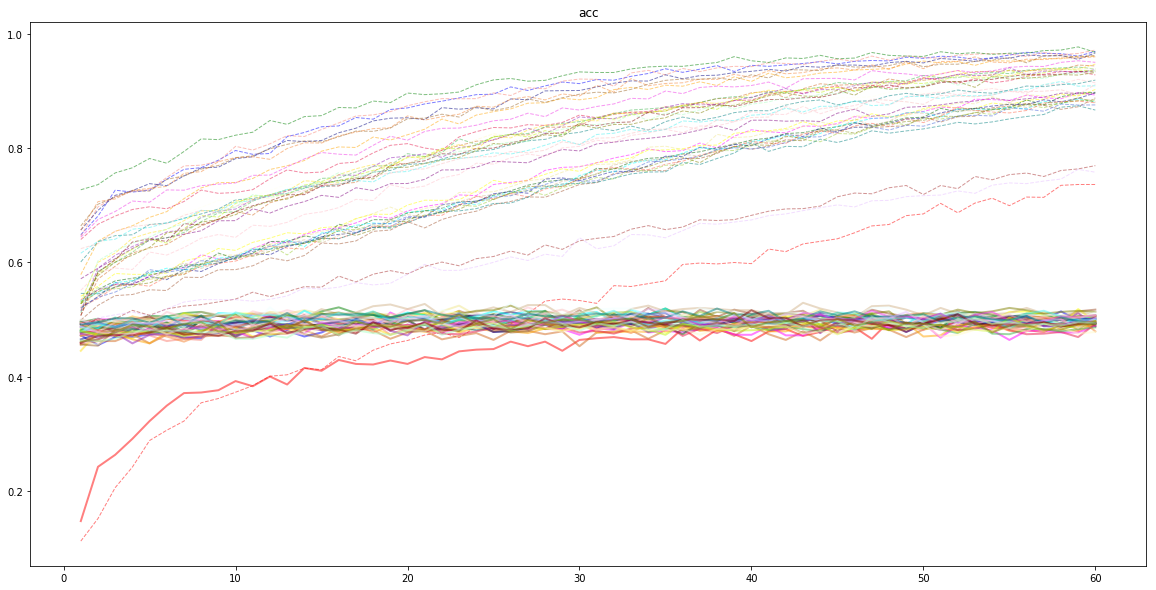

In [16]:
plt.figure(figsize=(20,10))
plot_exp_lines("acc")

,aug_type,magnitude,mean_last_loss
0,-,-,0.746977
35,1,0.648175758048116,0.705119
22,1,0.6481695332522834,0.685118
34,3,0.6481399887370382,0.387140
27,3,0.648078084558244,0.363193
9,3,0.9571551589530466,0.356809
23,3,0.6479270551277843,0.354539
18,3,0.6488736350620132,0.353756
17,3,0.647628440767774,0.350065
19,3,0.6481929878817196,0.346478


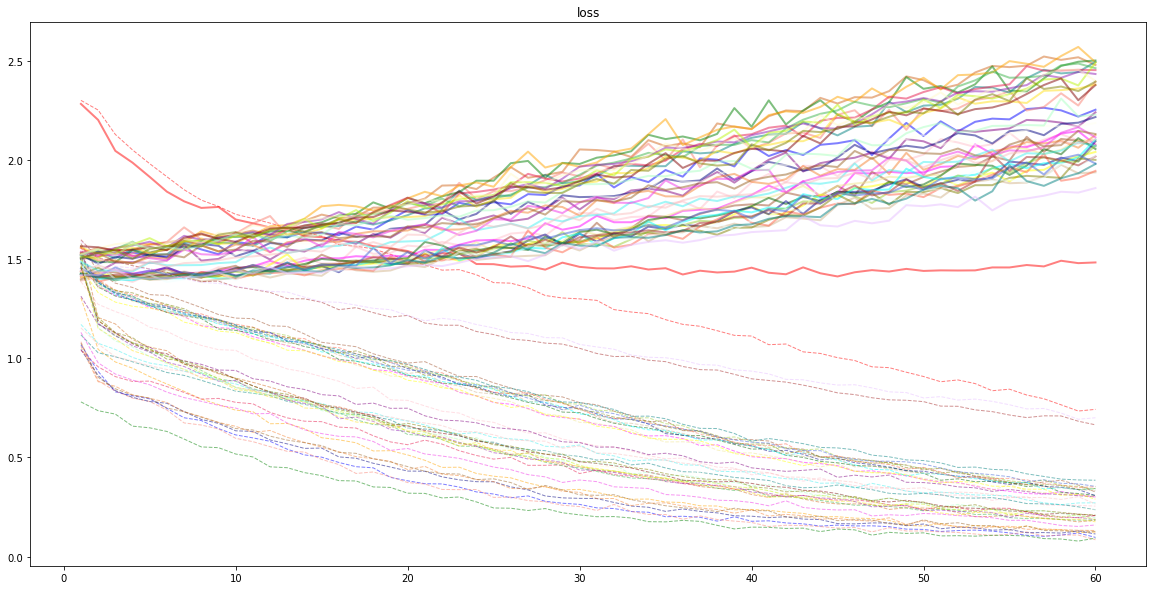

In [17]:
plt.figure(figsize=(20,10))
plot_exp_lines("loss")

,aug_type,magnitude,mean_last_acc
4,3,0.056712977317443194,0.971750
3,5,0.38438170729269994,0.966583
1,5,0.8442657485810175,0.964833
20,5,0.6479627426562876,0.961000
36,5,0.6481642773467897,0.960667
6,7,0.47997717237505744,0.959000
28,5,0.6480782346363644,0.958167
31,6,0.6481181209150076,0.950667
2,7,0.8472517387841256,0.941667
26,7,0.6484230885045211,0.941000


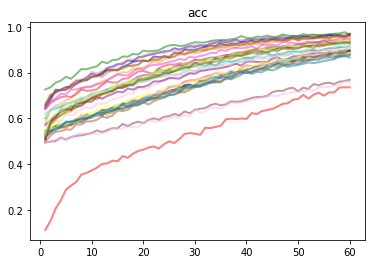

In [9]:
plot_exp_lines("acc")

,aug_type,magnitude,mean_last_loss
0,-,-,0.746977
35,1,0.648175758048116,0.705119
22,1,0.6481695332522834,0.685118
34,3,0.6481399887370382,0.387140
27,3,0.648078084558244,0.363193
9,3,0.9571551589530466,0.356809
23,3,0.6479270551277843,0.354539
18,3,0.6488736350620132,0.353756
17,3,0.647628440767774,0.350065
19,3,0.6481929878817196,0.346478


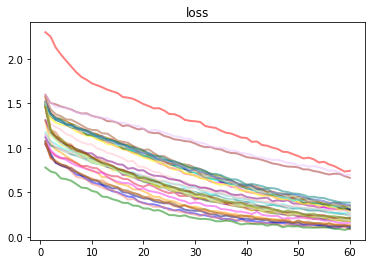

In [10]:
plot_exp_lines("loss")